In [1]:
import numpy as np
from base import *
from Optimizers import NewtonOptimizer

In [2]:
def rosenbrock(x):
    return 100 * (x[1] - x[0]**2)**2 + (1 - x[0])**2

def rosenbrock_grad(x):
    return np.array([-400 * x[0] * (x[1] - x[0]**2) - 2 * (1 - x[0]),
                     200 * (x[1] - x[0]**2)])

In [3]:
problem = OptimizationProblem(rosenbrock, rosenbrock_grad)
optimizer = NewtonOptimizer(problem, line_search_type='fixed', tol=1e-6, max_iter=100)

In [4]:
# A simple test on classic Netwon Optimizer
x0 = np.array([-1.5, 2.0])
x_star = optimizer.solve(x0)
print(f"Initialization: {x0}")
print(f"Optimization: {x_star}")
print(f"F(x_best): {rosenbrock(x_star)}")
print(f"Iterations: {optimizer.iter_info['iter']}")

Iteration 8: Problem converged!
Initialization: [-1.5  2. ]
Optimization: [0.99999968 0.99999935]
F(x_best): 1.0522817598541771e-13
Iterations: 8


In [ ]:
# Task 4: Newton with exact line search (Brent)
problem = OptimizationProblem(rosenbrock, rosenbrock_grad)
opt_exact = NewtonOptimizer(problem, line_search_type='exact', tol=1e-6, max_iter=500)

x0 = np.array([-1.2, 1.0], dtype=float)
x_star = opt_exact.solve(x0)

print(f"Initialization: {x0}")
print(f"Optimization: {x_star}")
print(f"F(x_best): {rosenbrock(x_star)}")
print(f"Iterations: {opt_exact.iter_info['iter']}")


Iteration 14: Problem converged!
Task 4 - Exact line search result:
x0: [-1.2  1. ]
x*: [1. 1.]
f(x*): 1.0091156635213127e-23
iters: 14


In [ ]:
# Task 5: test to veiry convergence on Rosenbrock
# 只测试了test_rosenbrock.py里面的test_newton_exact_line_search_rosenbrock
# 具体见tests/test_rosenbrock.py
!pytest -q tests/test_rosenbrock.py::test_newton_exact_line_search_rosenbrock

.                                                                        [100%]
1 passed in 0.52s


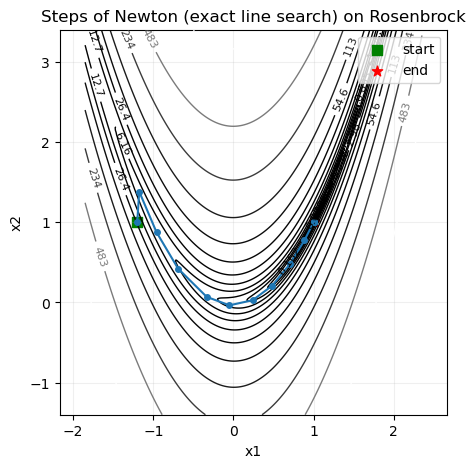

In [ ]:
# Task 5: Visualization: contour plot + iteration path (Fig.1 right style)
import numpy as np
import matplotlib.pyplot as plt

# 采样区域可根据初值与路径自动扩展
xs = np.array(opt_exact.iter_info['x'])  # shape: (k, 2)

x_min = min(xs[:, 0].min(), -1.5)
x_max = max(xs[:, 0].max(), 2.0)
y_min = min(xs[:, 1].min(), -1.0)
y_max = max(xs[:, 1].max(), 3.0)

pad_x = 0.1 * (x_max - x_min)
pad_y = 0.1 * (y_max - y_min)

xlin = np.linspace(x_min - pad_x, x_max + pad_x, 300)
ylin = np.linspace(y_min - pad_y, y_max + pad_y, 300)
X, Y = np.meshgrid(xlin, ylin)
Z = 100.0 * (Y - X**2)**2 + (1.0 - X)**2

plt.figure(figsize=(5, 5))
# 使用对数等高线，突出走势
levels = np.logspace(-3, 3, 20)
CS = plt.contour(X, Y, Z, levels=levels, cmap='gray', linewidths=1)
plt.clabel(CS, inline=1, fontsize=8, fmt='%.3g')

# 叠加迭代轨迹
plt.plot(xs[:, 0], xs[:, 1], '-o', color='tab:blue', markersize=4, linewidth=1.5)
# 标注起点与终点
plt.scatter(xs[0, 0], xs[0, 1], c='green', s=60, marker='s', label='start')
plt.scatter(xs[-1, 0], xs[-1, 1], c='red', s=60, marker='*', label='end')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Steps of Newton (exact line search) on Rosenbrock')
plt.legend()
plt.axis('equal')
plt.grid(True, alpha=0.2)
plt.show()
